In [35]:
#Import dependencies
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [36]:
#read csv
file_one = os.path.join("olympicsall.csv")
olympics_df = pd.read_csv(file_one, encoding = "ISO-8859-1")
olympics_df.dropna

dict_df = pd.read_csv ("olympic_dict.csv", encoding = "ISO-8859-1")
medcountry = pd.read_csv ("countrymed.csv", encoding = "ISO-8859-1")

#Merge Summer and Winter Olympic Information
SW_Merge = pd.merge(dict_df, medcountry, on="Country")


In [37]:
#Clean up and format df
SW_Merge.dropna
SW_Merge["Population"] = SW_Merge['Population']*.000001
SW_Merge.round(decimals=2).head(5)

,Country,Population,GDP per Capita,Total Medal Count
0,Afghanistan,32.53,594.32,2.0
1,Algeria,39.67,4206.03,15.0
2,Argentina,43.42,13431.88,259.0
3,Armenia,3.02,3489.13,11.0
4,Australia,23.78,56310.96,1204.0


In [38]:
#Group df clean DF
country_df = olympics_df.groupby('Country')
pop_df=country_df['Population'].mean()*.000001
medcount_df=country_df['Medal'].count()

In [39]:
#Concat two dfs
popmed_df=pd.concat([pop_df, medcount_df], axis=1) 
popmed_df.head()

,Population,Medal
Country,,
Afghanistan,32.526562,2
Algeria,39.666519,15
Argentina,43.416755,259
Armenia,3.017712,11
Australia,23.781169,1204


In [40]:
#Rename Columns
popmed_df.rename(columns={'Medal':'Total Medal Count', 'Population': 'Population (millions)'}, inplace=True)
popmed_df.head()

,Population (millions),Total Medal Count
Country,,
Afghanistan,32.526562,2
Algeria,39.666519,15
Argentina,43.416755,259
Armenia,3.017712,11
Australia,23.781169,1204


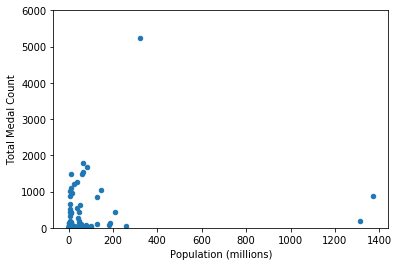

In [41]:
#Plot Data
popmed_df.plot(kind='scatter', x='Population (millions)', y='Total Medal Count')
plt.xlim()
plt.ylim(0,6000)
plt.savefig('Pop vs Medal Count overall.png', dpi = 600)
plt.show()


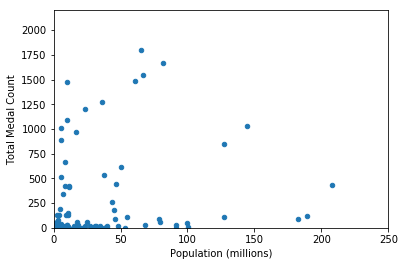

In [42]:
#Zoom in on plot
popmed_df.plot(kind='scatter', x='Population (millions)', y='Total Medal Count')
plt.xlim(0,250)
plt.ylim(0,2200)
plt.savefig('Pop vs Medal Count zoom 1.png', dpi = 600)
plt.show()


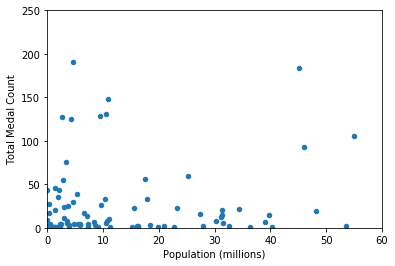

In [43]:
#Zoom in more on plot
popmed_df.plot(kind='scatter', x='Population (millions)', y='Total Medal Count')
plt.xlim(0,60)
plt.ylim(0,250)
plt.savefig('Pop vs Medal Count zoom 2.png', dpi = 600)
plt.show()

In [44]:
#Create Bins to segment data by population
pop_bins = [0, 2.95, 8.400000, 20.000000, 50.000000, 99999999999 ]
pop_names = ["Under 3", "3 to 8.4", "8.4 to 20", "20 to 50 ", "50+"]

# Categorize the Countries into population bins
SW_Merge['Pop Seg']=pd.cut(SW_Merge["Population"], pop_bins, labels=pop_names)
SW_Merge.head(5)
pop_demographics_totals = SW_Merge["Pop Seg"].value_counts()
pop_demographics_totals = pd.DataFrame({"Number of Countries": pop_demographics_totals})
pop_demographics_totals.sort_index()

,Number of Countries
Under 3,26
3 to 8.4,26
8.4 to 20,26
20 to 50,25
50+,24


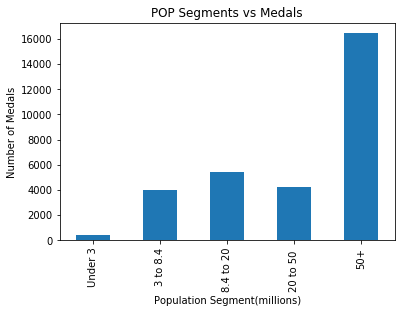

In [45]:
#Plot to see the results
popseg_=SW_Merge.groupby('Pop Seg')
med_=popseg_['Total Medal Count'].sum()
pop_chart = med_.plot(kind="Bar", title="POP Segments vs Medals")
pop_chart.set_xlabel("Population Segment(millions)")
pop_chart.set_ylabel("Number of Medals")
plt.savefig('Pop vs Medal Count bins', dpi = 600, bbox_inches = 'tight')
plt.show()

In [46]:
#new df with selected columns
gdpmed_ser=SW_Merge[['Country', 'GDP per Capita', 'Total Medal Count']].copy()
#gdpmed_ser["GDP per Capita"]=gdpmed_ser["GDP per Capita"].map("$ {:,.2f}".format)
gdpmed_ser.head()

,Country,GDP per Capita,Total Medal Count
0,Afghanistan,594.323081,2.0
1,Algeria,4206.031232,15.0
2,Argentina,13431.878340,259.0
3,Armenia,3489.127690,11.0
4,Australia,56310.962990,1204.0


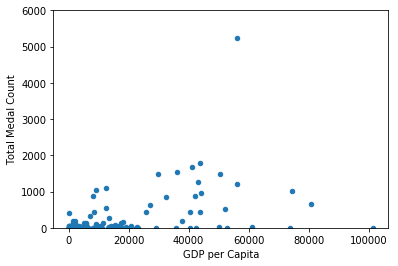

In [47]:
#GDP per Capita plot
gdpmed_ser.plot(kind='scatter', x='GDP per Capita', y='Total Medal Count')
plt.xlim()
plt.ylim(0,6000)
plt.savefig('GDP vs Medal Count overall.png', dpi = 600)
plt.show()

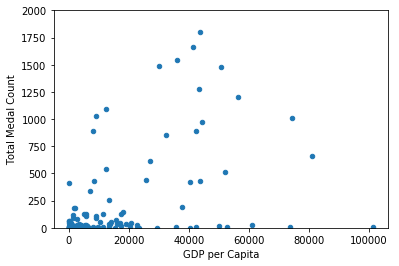

In [48]:
#GDP per Capita plot zoomed in
gdpmed_ser.plot(kind='scatter', x='GDP per Capita', y='Total Medal Count')
plt.xlim()
plt.ylim(0,2000)
plt.savefig('GDP vs Medal Count zoom 1.png', dpi = 600)
plt.show()

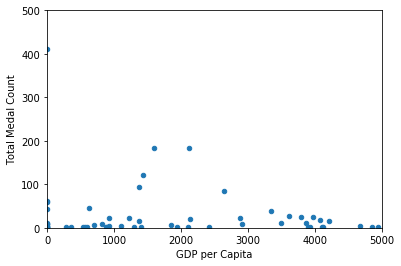

In [49]:
#GDP per Capita plot zoomed in more
gdpmed_ser.plot(kind='scatter', x='GDP per Capita', y='Total Medal Count')
plt.xlim(0,5000)
plt.ylim(0,500)
plt.savefig('GDP vs Medal Count zoom 2.png', dpi = 600)
plt.show()

In [50]:
#Bin GDP Data
gdp_bins = [0, 2120, 5600, 12000, 32000, 999999 ]
gdp_names = ["Under $2,100", "$2,100 to 5,600", "$5,600 to 12,000", "$12,000 to 32,000", "$32,000+"]

# Categorize the Countries into population bins
SW_Merge['GDP Seg']=pd.cut(SW_Merge["GDP per Capita"], gdp_bins, labels=gdp_names)
SW_Merge.head(5)
#Visualize the breakdown of the segments
gdp_demographics_totals = SW_Merge["GDP Seg"].value_counts()
gdp_demographics_totals = pd.DataFrame({"Number of Countries": gdp_demographics_totals})
gdp_demographics_totals.sort_index()

,Number of Countries
"Under $2,100",24
"$2,100 to 5,600",23
"$5,600 to 12,000",23
"$12,000 to 32,000",24
"$32,000+",24


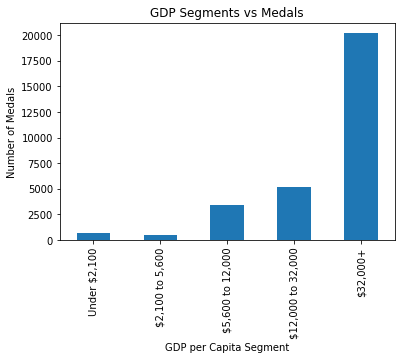

In [51]:
#GDP per capita Binned bar plot
gdpseg_=SW_Merge.groupby('GDP Seg')
med1_=gdpseg_['Total Medal Count'].sum()
gdp_chart = med1_.plot(kind="Bar", title="GDP Segments vs Medals")
gdp_chart.set_xlabel("GDP per Capita Segment")
gdp_chart.set_ylabel("Number of Medals")
plt.savefig('GDP vs Medal Count bins', dpi = 600, bbox_inches = 'tight')
plt.show()